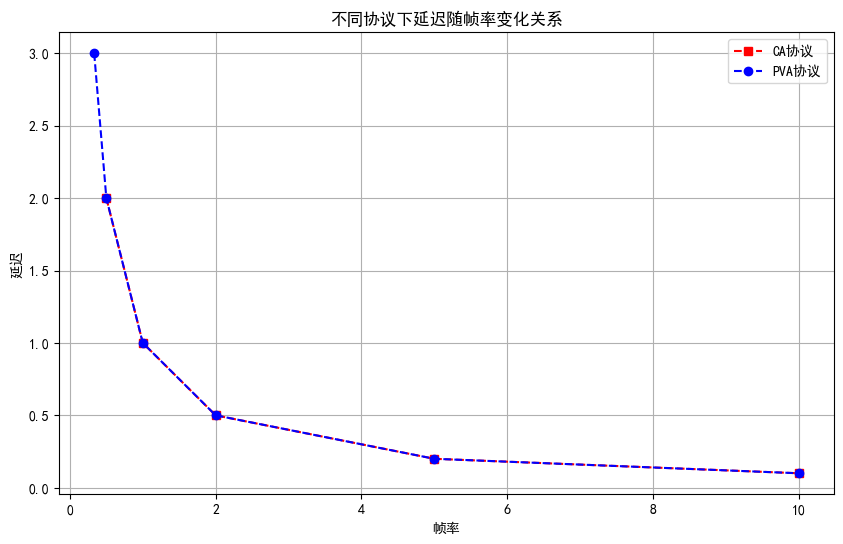

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 设置matplotlib显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

# 文件与协议、帧率映射
file_info = {
    "latency02.csv": {"protocol": "pva", "fps": 1/3},
    "latency03.csv": {"protocol": "ca",  "fps": 1/2},
    "latency04.csv": {"protocol": "pva", "fps": 1/2},
    "latency05.csv": {"protocol": "ca",  "fps": 1},
    "latency06.csv": {"protocol": "pva", "fps": 1},
    "latency07.csv": {"protocol": "ca",  "fps": 2},
    "latency08.csv": {"protocol": "pva", "fps": 2},
    "latency09.csv": {"protocol": "ca",  "fps": 5},
    "latency10.csv": {"protocol": "pva", "fps": 5},
    "latency11.csv": {"protocol": "ca",  "fps": 10},
    "latency12.csv": {"protocol": "pva", "fps": 10},
}

data_dir = r"c:\Users\suanz\OneDrive\桌面\相机测试方案\epics_cam_test_image\data"
dfs = []

# 读取并预处理数据
for fname, info in file_info.items():
    fpath = os.path.join(data_dir, fname)
    df = pd.read_csv(fpath)
    # 删除前五行
    df = df.iloc[5:].reset_index(drop=True)
    # 只保留 frame_interval_sec 列
    df = df[["frame_interval_sec"]]
    # 强制转换为数值类型，无法转换的变为NaN
    df["latency"] = pd.to_numeric(df["frame_interval_sec"], errors="coerce")
    df = df.dropna(subset=["latency"])
    df["protocol"] = info["protocol"]
    df["fps"] = info["fps"]
    df["filename"] = fname
    dfs.append(df[["latency", "protocol", "fps", "filename"]])

all_data = pd.concat(dfs, ignore_index=True)

# 按协议和帧率分组，计算均值
grouped = all_data.groupby(["protocol", "fps"])["latency"].mean().reset_index()

# 绘制：横坐标为帧率，纵坐标为延迟，协议为不同曲线
plt.figure(figsize=(10,6))
for protocol in grouped["protocol"].unique():
    prot_data = grouped[grouped["protocol"] == protocol]
    # plt.plot(prot_data["fps"], prot_data["latency"], marker='o', label=f"{protocol.upper()}协议")
    if protocol == "pva":
        plt.plot(prot_data["fps"], prot_data["latency"], marker='o', linestyle='--', color='blue', label="PVA协议")
    else:
        plt.plot(prot_data["fps"], prot_data["latency"], marker='s', linestyle='--', color='red', label="CA协议")
plt.xlabel("帧率")
plt.ylabel("延迟")
plt.title("不同协议下延迟随帧率变化关系")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
print(grouped)

# 按协议和帧率分组，计算均值
grouped = all_data.groupby(["protocol", "fps"])["latency"].mean().reset_index()
# 增加理论延迟列（fps的倒数）
grouped["theoretical_latency"] = 1 / grouped["fps"]

# 增加差值列
grouped["diff(ms)"] = (grouped["latency"] - grouped["theoretical_latency"]) * 1000

print(grouped)


   protocol        fps   latency
0        ca   0.500000  2.000008
1        ca   1.000000  1.000111
2        ca   2.000000  0.500067
3        ca   5.000000  0.200078
4        ca  10.000000  0.100143
5       pva   0.333333  3.000048
6       pva   0.500000  1.999987
7       pva   1.000000  0.999987
8       pva   2.000000  0.500142
9       pva   5.000000  0.200053
10      pva  10.000000  0.100058
   protocol        fps   latency  theoretical_latency  diff(ms)
0        ca   0.500000  2.000008                  2.0  0.008441
1        ca   1.000000  1.000111                  1.0  0.111085
2        ca   2.000000  0.500067                  0.5  0.066807
3        ca   5.000000  0.200078                  0.2  0.078050
4        ca  10.000000  0.100143                  0.1  0.143171
5       pva   0.333333  3.000048                  3.0  0.048494
6       pva   0.500000  1.999987                  2.0 -0.013154
7       pva   1.000000  0.999987                  1.0 -0.012622
8       pva   2.000000  0.50

CPU利用率均值:  13.529361702127662
内存利用率均值:  10.000425531914892
内存使用均值(MB):  6423.972922207447


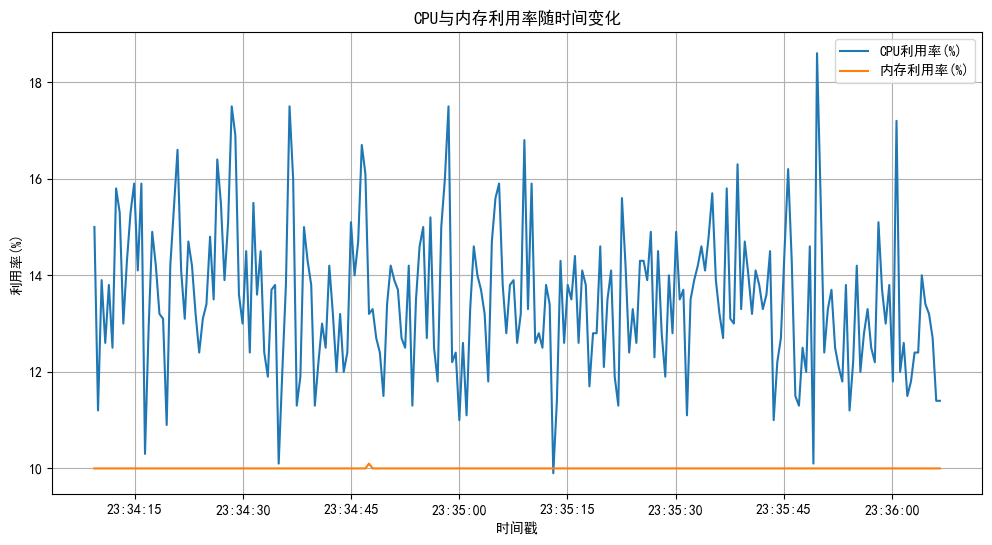

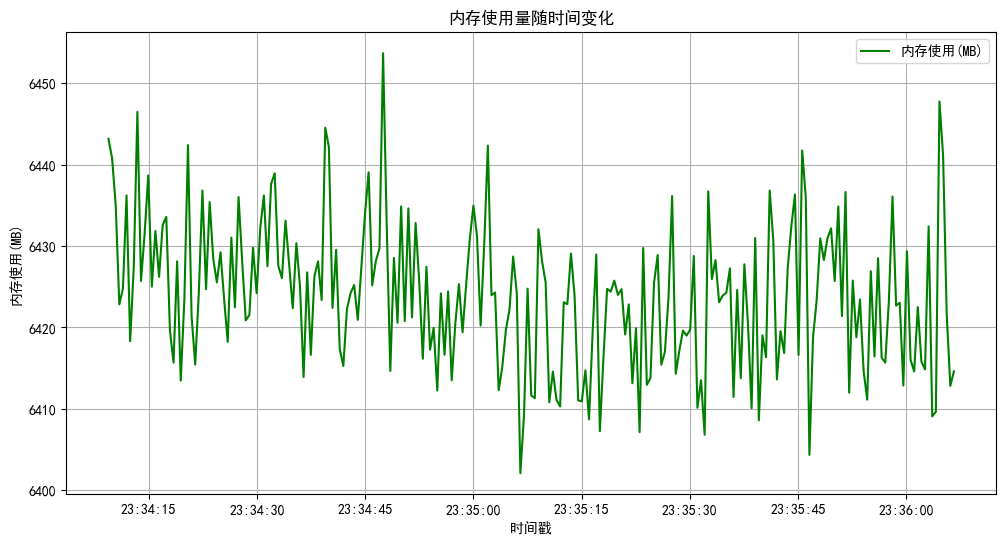

In [7]:


# 读取数据
cpu_file = r"c:\Users\suanz\OneDrive\桌面\相机测试方案\epics_cam_test_image\data\stress_cpu01.csv"
df_cpu = pd.read_csv(cpu_file)

# 删除前5行（与延迟文件一致，保证数据稳定）
df_cpu = df_cpu.iloc[5:].reset_index(drop=True)
df_cpu["time"] = pd.to_datetime(df_cpu["timestamp"], unit="s")
df_cpu["time"] = df_cpu["time"] + pd.Timedelta(hours=8)  # 如果需要北京时间
# 简单统计分析
print("CPU利用率均值: ", df_cpu["cpu_percent"].mean())
print("内存利用率均值: ", df_cpu["memory_percent"].mean())
print("内存使用均值(MB): ", df_cpu["memory_used_mb"].mean())

# 绘制CPU和内存利用率随时间变化
plt.figure(figsize=(12,6))
plt.plot(df_cpu["time"], df_cpu["cpu_percent"], label="CPU利用率(%)")
plt.plot(df_cpu["time"], df_cpu["memory_percent"], label="内存利用率(%)")
plt.xlabel("时间戳")
plt.ylabel("利用率(%)")
plt.title("CPU与内存利用率随时间变化")
plt.legend()
plt.grid(True)
plt.show()

# 绘制内存使用量随时间变化
plt.figure(figsize=(12,6))
plt.plot(df_cpu["time"], df_cpu["memory_used_mb"], label="内存使用(MB)", color='green')
plt.xlabel("时间戳")
plt.ylabel("内存使用(MB)")
plt.title("内存使用量随时间变化")
plt.legend()
plt.grid(True)
plt.show()